## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('1. dataset.csv', index_col='Index')

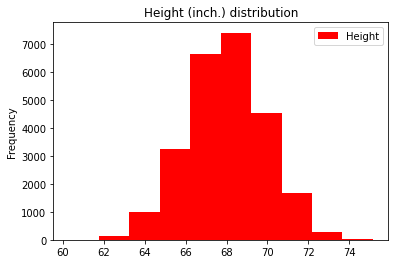

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')
plt.show()

Посмотреть на первые 5 записей. Сделать похожую гистограмму для роста, но зеленого цвета.

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


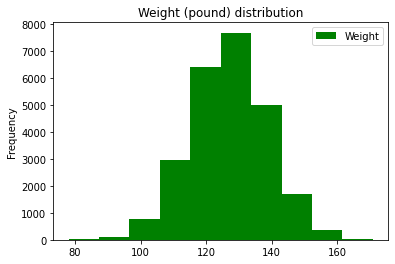

In [5]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pound) distribution')
plt.show()

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

Построить картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

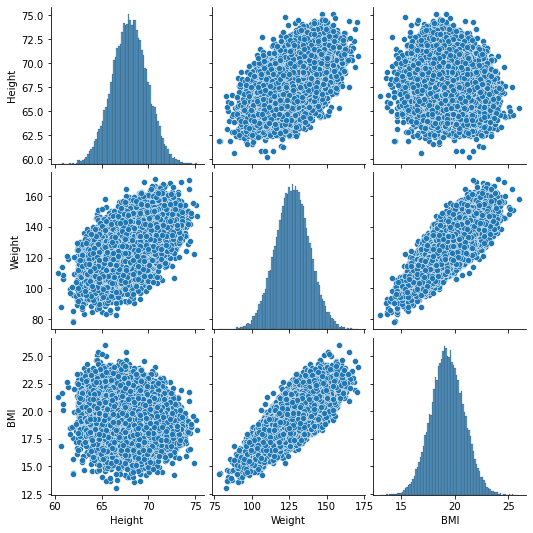

In [8]:
sns.pairplot(data=data)
plt.show()

Создать в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Построить «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Подписать ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

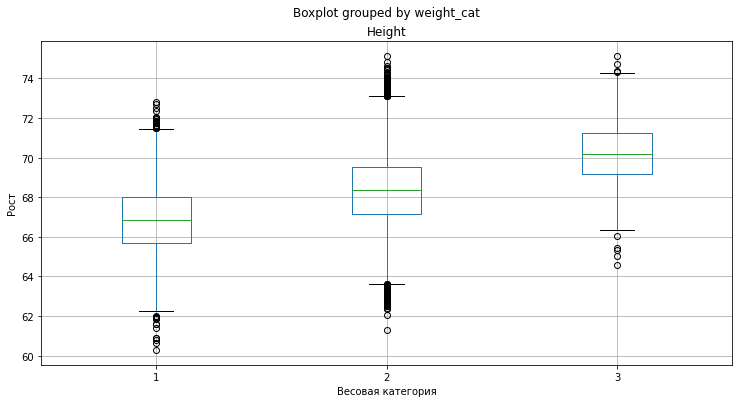

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
fig, ax = plt.subplots(figsize=(12, 6))
data.boxplot(column='Height', by='weight_cat', ax=ax)
plt.xlabel("Весовая категория")
plt.ylabel("Рост")
plt.show()

Построить scatter plot зависимости роста от веса. Подписать картинку.

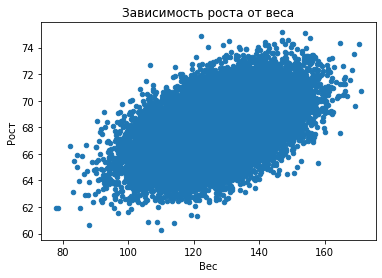

In [10]:
data.plot(x="Weight", y="Height", kind="scatter")
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Зависимость роста от веса")
plt.show()

## Задание 2. Минимизация квадратичной ошибки

Написать функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [11]:
def error(w0, w1):
    return sum([(y - (w0 + w1*x))**2 for (x, y) in zip(xs, ys)])

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

Провести на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Подписать оси и график.

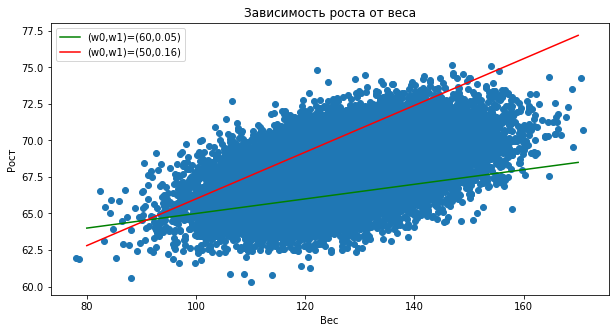

In [12]:
x = np.linspace(80, 170)
y1 = 60 + 0.05 * x
y2 = 50 + 0.16 * x

plt.figure(figsize=(10, 5))
plt.scatter(data['Weight'], data['Height'])
plt.plot(x, y1, label="(w0,w1)=(60,0.05)", c="g")
plt.plot(x, y2, label="(w0,w1)=(50,0.16)", c="r")
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Зависимость роста от веса")
plt.legend()
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Построить график зависимости функции ошибки, посчитанной ранее, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

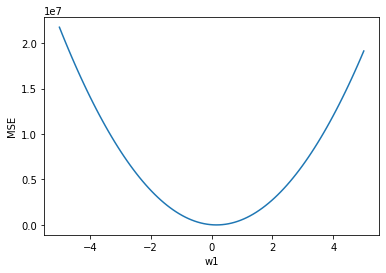

In [13]:
xs = x
ys = y2
w1 = np.linspace(-5, 5, 100)
q = error(50, w1)

plt.plot(w1, q)
plt.xlabel("w1")
plt.ylabel("MSE")
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в ранее, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное оптимальное значение параметра $w_1$. 

In [14]:
from scipy.optimize import minimize_scalar

minimize_result = minimize_scalar(fun=lambda x: error(50, x), bounds=(-5, 5))
w_opt = minimize_result.x

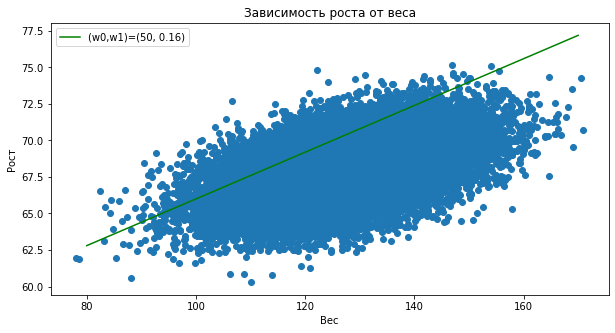

In [15]:
x = np.linspace(80, 170)
y = 50 + w_opt * x

plt.figure(figsize=(10, 5))
plt.scatter(data['Weight'], data['Height'])
plt.plot(x, y, label=f"(w0,w1)=(50, {round(w_opt, 2)})", c="g")
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Зависимость роста от веса")
plt.legend()
plt.show()

Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

In [16]:
from mpl_toolkits.mplot3d import Axes3D

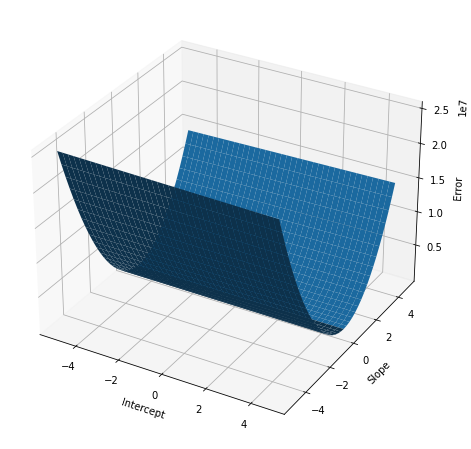

In [17]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
e = error(w0, w1)

surf = ax.plot_surface(w0, w1, e)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной ранее, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [18]:
def error(w):
    return sum([(y - (w[0] + w[1]*x))**2 for (x, y) in zip(xs, ys)])

In [19]:
from scipy.optimize import minimize

minimize_result = minimize(fun=error, x0=(0, 0), bounds=[(-100, 100), (-5, 5)], method="L-BFGS-B")

In [20]:
w0, w1 = minimize_result.x

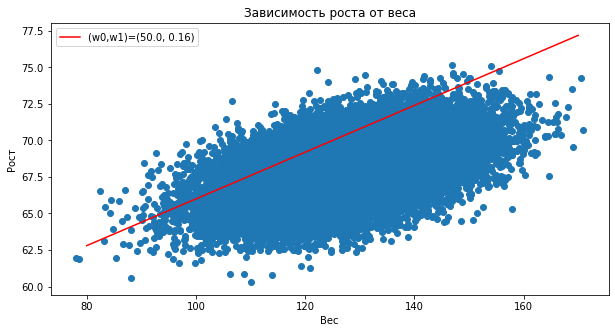

In [21]:
x = np.linspace(80, 170)
y = w0 + w1 * x

plt.figure(figsize=(10, 5))
plt.scatter(data['Weight'], data['Height'])
plt.plot(x, y, label=f"(w0,w1)=({round(w0, 2)}, {round(w1, 2)})", c="r")
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Зависимость роста от веса")
plt.legend()
plt.show()